Groupe 8 - NGUYEN Nhat-Vy Jessica - ROSENGARD Xavier - SALAUN Camille

# **MASTER CAMP - Project DATA**

## Importation of the files

We start by the basic library import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy import stats

We import the data and merge it on the ID so it's sorted

In [ ]:
df2018 = pd.read_csv("valeursfoncieres-2018.txt", sep="|", low_memory=False)
df2019 = pd.read_csv("valeursfoncieres-2019.txt", sep="|", low_memory=False)
df2020 = pd.read_csv("valeursfoncieres-2020.txt", sep="|", low_memory=False)
df2021 = pd.read_csv("valeursfoncieres-2021.txt", sep="|", low_memory=False)
df2022 = pd.read_csv("valeursfoncieres-2022.txt", sep="|", low_memory=False)

df2018.shape
df2018

We merge all the data set

In [ ]:
df = pd.concat([df2018,df2019,df2020,df2021,df2022])
df.shape
df

We then do a first cleaning by dropping the columns and rows that are completly null as well as eliminating the duplicates :

In [ ]:
df = df.dropna(how="all")

In [ ]:
df = df.dropna(axis=1, how="all")

In [ ]:
df.drop_duplicates(keep=False, inplace=True)
df.shape
df

We create a csv with the dataframe to avoid repeating those first long step each time

In [ ]:
df.to_csv("valeursfoncieres-all.csv", index=False)

#### Loading the new csv

In [2]:
new_df = pd.read_csv("valeursfoncieres-all.csv", low_memory=False)
new_df.shape
new_df

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,1,03/01/2018,Vente,"109000,00",13.0,NaN,RUE,1660,GEN LOGEROT,1000.0,...,NaN,NaN,2,2.0,Appartement,73.0,4.0,NaN,NaN,NaN
1,1,03/01/2018,Vente,"109000,00",13.0,NaN,RUE,1660,GEN LOGEROT,1000.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
2,1,04/01/2018,Vente,"239300,00",4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,...,NaN,NaN,0,1.0,Maison,163.0,4.0,S,NaN,949.0
3,1,04/01/2018,Vente,"239300,00",4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,...,NaN,NaN,0,1.0,Maison,163.0,4.0,AG,JARD,420.0
4,1,04/01/2018,Vente,"239300,00",4.0,NaN,RUE,0025,DE LA BARMETTE,1250.0,...,NaN,NaN,0,1.0,Maison,51.0,2.0,AG,JARD,420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17426019,1,30/12/2022,Vente,"3500000,00",19.0,NaN,RUE,4879,JEAN DOLENT,75014.0,...,NaN,NaN,1,4.0,Local industriel. commercial ou assimilé,327.0,0.0,NaN,NaN,NaN
17426020,1,19/12/2022,Vente,"525000,00",3.0,NaN,RUE,3842,FREDERIC MAGISSON,75015.0,...,NaN,NaN,2,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN
17426021,1,19/12/2022,Vente,"525000,00",3.0,NaN,RUE,3842,FREDERIC MAGISSON,75015.0,...,NaN,NaN,2,2.0,Appartement,40.0,3.0,NaN,NaN,NaN
17426022,1,30/12/2022,Vente,"15500,00",69.0,NaN,RUE,0679,BARRAULT,75013.0,...,NaN,NaN,1,3.0,Dépendance,0.0,0.0,NaN,NaN,NaN


### We replace all values that are not of integer or float type by intergers. First, we will separate the column into those of text content and float/integer content (not type):

In [3]:
new_df.info()
non_numbers = ['Nature mutation', 'B/T/Q', 'Type de voie', 'Voie', 'Code voie','Commune', 'Section', 'No Volume','Type local', 'Nature culture', 'Nature culture speciale', '1er lot', '2eme lot', '3eme lot', '4eme lot', '5eme lot']
convert_float = ['Valeur fonciere','Code departement','Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot','Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17426024 entries, 0 to 17426023
Data columns (total 35 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   No disposition              int64  
 1   Date mutation               object 
 2   Nature mutation             object 
 3   Valeur fonciere             object 
 4   No voie                     float64
 5   B/T/Q                       object 
 6   Type de voie                object 
 7   Code voie                   object 
 8   Voie                        object 
 9   Code postal                 float64
 10  Commune                     object 
 11  Code departement            object 
 12  Code commune                int64  
 13  Prefixe de section          float64
 14  Section                     object 
 15  No plan                     int64  
 16  No Volume                   object 
 17  1er lot                     object 
 18  Surface Carrez du 1er lot   object 
 19  2eme lot           

As we have department 2A and 2B but all the others department are integers, we will replace 2A by value 201 and 2B by value 202 to be able to convert the whole column to floats without error. Also, as the numbers into the convert_float variable are separated by "," instead of ".", we need to replace the commas by point so that it is not considered as string :

In [ ]:
new_df = new_df.replace({'2A': '201', '2B': '202'})
for column in convert_float:
    new_df[column] = new_df[column].str.replace(',', '.')

Now, we will create a dictionary to create corresponding integer values for each text content:

In [4]:
dict_conversion = {} #creation of a dictionary to save the correspondency between the different values (text) and the numbers associated to them
list_unique = [] #to retrive and save all non number values
for col in non_numbers:
    list_unique.extend(new_df[col].unique())

list_unique = list(set(list_unique)) #remove duplicates

for index, val in enumerate(list_unique):
    dict_conversion[val] = index # Assign a unique number to each unique value


Now that we have created a corresponding value for each non numbers variable, we will replace them by it and also transform all object containing numbers into integers or float type :

In [ ]:
for col in non_numbers:
    new_df[col] = new_df[col].map(dict_conversion).fillna(new_df[col])

#To convert columns into float and int :
new_df[convert_float] = new_df[convert_float].astype(float)
new_df.info()

As you can see, there is no more object type columns into our dataframe (apart from the date as it will serve as index). We will just save the current data frame so that it will be simpler for the further changes :

In [ ]:
new_df.to_csv("valeursfoncieres-converted.csv", index=False)

## Exploratory Data Analysis (EDA)

First, lets check which variables contains Nan values (we will not includes the date variable) :

In [30]:
del new_df #to empty the variable
new_df = pd.read_csv("valeursfoncieres-converted.csv", low_memory=False)
data_numbers = new_df.drop('Date mutation', axis=1)
data_numbers.isnull().sum()/len(data_numbers)*100

No disposition                 0.000000
Nature mutation                0.000000
Valeur fonciere                0.832152
No voie                       41.066448
B/T/Q                          0.000000
Type de voie                   0.000000
Code voie                      0.000000
Voie                           0.000000
Code postal                    0.961510
Commune                        0.000000
Code departement               0.000000
Code commune                   0.000000
Prefixe de section            95.366126
Section                        0.000000
No plan                        0.000000
No Volume                      0.000000
1er lot                        0.000000
Surface Carrez du 1er lot     90.922479
2eme lot                       0.000000
Surface Carrez du 2eme lot    97.490959
3eme lot                       0.000000
Surface Carrez du 3eme lot    99.783852
4eme lot                       0.000000
Surface Carrez du 4eme lot    99.945386
5eme lot                       0.000000


#### We replace the Nan by 0 for the numerical columns (thoose that weren't included into the non-number list)

In [31]:
columns_to_fill = ['Surface reelle bati', 'Surface terrain', 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot', 'Valeur fonciere']

new_df.fillna({col: 0 for col in columns_to_fill}, inplace=True)

new_df

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,1,03/01/2018,689485,109000.0,13.0,1115523,1078285,153518,273138,1000.0,...,1115523,0.0,2,2.0,285771,73.0,4.0,1115523,1115523,0.0
1,1,03/01/2018,689485,109000.0,13.0,1115523,1078285,153518,273138,1000.0,...,1115523,0.0,1,3.0,163724,0.0,0.0,1115523,1115523,0.0
2,1,04/01/2018,689485,239300.0,4.0,1115523,1078285,955115,1106157,1250.0,...,1115523,0.0,0,1.0,81565,163.0,4.0,796819,1115523,949.0
3,1,04/01/2018,689485,239300.0,4.0,1115523,1078285,955115,1106157,1250.0,...,1115523,0.0,0,1.0,81565,163.0,4.0,771363,935179,420.0
4,1,04/01/2018,689485,239300.0,4.0,1115523,1078285,955115,1106157,1250.0,...,1115523,0.0,0,1.0,81565,51.0,2.0,771363,935179,420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17426019,1,30/12/2022,689485,3500000.0,19.0,1115523,1078285,113077,947396,75014.0,...,1115523,0.0,1,4.0,56906,327.0,0.0,1115523,1115523,0.0
17426020,1,19/12/2022,689485,525000.0,3.0,1115523,1078285,370061,992486,75015.0,...,1115523,0.0,2,3.0,163724,0.0,0.0,1115523,1115523,0.0
17426021,1,19/12/2022,689485,525000.0,3.0,1115523,1078285,370061,992486,75015.0,...,1115523,0.0,2,2.0,285771,40.0,3.0,1115523,1115523,0.0
17426022,1,30/12/2022,689485,15500.0,69.0,1115523,1078285,225004,748993,75013.0,...,1115523,0.0,1,3.0,163724,0.0,0.0,1115523,1115523,0.0


##### We add a column corresponding to the price/square-meter and drop the column where there is no surface at all :

In [32]:
# We filter some data and calculate the surface
new_df = new_df[new_df['Valeur fonciere'] != 0]

new_df["Surface Carrez Total"] = new_df.filter(like='Surface Carrez').sum(axis=1)
new_df.loc[new_df["Surface Carrez Total"] == 0, "Surface Carrez Total"] = new_df.loc[new_df["Surface Carrez Total"] == 0, "Surface reelle bati"]
new_df.loc[new_df["Surface Carrez Total"] == 0, "Surface Carrez Total"] = new_df.loc[new_df["Surface Carrez Total"] == 0, "Surface terrain"]

new_df = new_df[new_df["Surface Carrez Total"] != 0]

# We calculate the price by square metter
new_df['Prix par metre carre'] =  new_df['Valeur fonciere'] / new_df["Surface Carrez Total"]

new_df

C:\Users\salau\AppData\Local\Temp\ipykernel_876\2413669357.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Surface Carrez Total"] = new_df.filter(like='Surface Carrez').sum(axis=1)


,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Carrez Total,Prix par metre carre
0,1,03/01/2018,689485,109000.0,13.0,1115523,1078285,153518,273138,1000.0,...,2,2.0,285771,73.0,4.0,1115523,1115523,0.0,73.00,1493.150685
2,1,04/01/2018,689485,239300.0,4.0,1115523,1078285,955115,1106157,1250.0,...,0,1.0,81565,163.0,4.0,796819,1115523,949.0,163.00,1468.098160
3,1,04/01/2018,689485,239300.0,4.0,1115523,1078285,955115,1106157,1250.0,...,0,1.0,81565,163.0,4.0,771363,935179,420.0,163.00,1468.098160
4,1,04/01/2018,689485,239300.0,4.0,1115523,1078285,955115,1106157,1250.0,...,0,1.0,81565,51.0,2.0,771363,935179,420.0,51.00,4692.156863
5,1,04/01/2018,689485,239300.0,4.0,1115523,1078285,955115,1106157,1250.0,...,0,1.0,81565,51.0,2.0,796819,1115523,949.0,51.00,4692.156863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17426016,1,03/11/2022,910828,291000.0,128.0,1115523,1078285,1033850,1069267,75015.0,...,1,2.0,285771,35.0,2.0,1115523,1115523,0.0,35.00,8314.285714
17426018,1,23/12/2022,388566,934000.0,5.0,1115523,279503,222285,1104938,75016.0,...,2,2.0,285771,58.0,2.0,1115523,1115523,0.0,58.00,16103.448276
17426019,1,30/12/2022,689485,3500000.0,19.0,1115523,1078285,113077,947396,75014.0,...,1,4.0,56906,327.0,0.0,1115523,1115523,0.0,327.00,10703.363914
17426020,1,19/12/2022,689485,525000.0,3.0,1115523,1078285,370061,992486,75015.0,...,2,3.0,163724,0.0,0.0,1115523,1115523,0.0,46.65,11254.019293


Lets check if there is other Nan values :

In [33]:
data_numbers = new_df.drop('Date mutation', axis=1)
data_numbers.isnull().sum()/len(data_numbers)*100

No disposition                 0.000000
Nature mutation                0.000000
Valeur fonciere                0.000000
No voie                       44.583031
B/T/Q                          0.000000
Type de voie                   0.000000
Code voie                      0.000000
Voie                           0.000000
Code postal                    0.063005
Commune                        0.000000
Code departement               0.000000
Code commune                   0.000000
Prefixe de section            95.618956
Section                        0.000000
No plan                        0.000000
No Volume                      0.000000
1er lot                        0.000000
Surface Carrez du 1er lot      0.000000
2eme lot                       0.000000
Surface Carrez du 2eme lot     0.000000
3eme lot                       0.000000
Surface Carrez du 3eme lot     0.000000
4eme lot                       0.000000
Surface Carrez du 4eme lot     0.000000
5eme lot                       0.000000


Now, we will also fill the remaining columns using the dictionary. First, lets replace by 0 the empty values into No voie and Prefixe de section :

In [34]:
del columns_to_fill
columns_to_fill = ['No voie', 'Prefixe de section', 'Code type local']
new_df.fillna({col: 0 for col in columns_to_fill}, inplace=True)

Now, for the Nombre pieces principales columns empty row : we will find the mean of "Nombre pieces principales" for each unique value of "Surface Carrez Total" inside the Surface_empty_piece list and fill the empty "Nombre pieces principales" values with it :

In [39]:
Surface_empty_piece = new_df.loc[new_df['Nombre pieces principales'].isnull(), 'Surface Carrez Total'].unique()
print(Surface_empty_piece)

[278.    23.   126.   ...  21.96  16.59  26.47]


In [40]:
mean_pieces_df = new_df.groupby('Surface Carrez Total')['Nombre pieces principales'].mean()
new_df['Nombre pieces principales'].fillna(new_df['Surface Carrez Total'].map(mean_pieces_df), inplace=True)

Thanks to those steps, all columns are now fill up :

In [41]:
data_numbers = new_df.drop('Date mutation', axis=1)
data_numbers.isnull().sum()/len(data_numbers)*100

No disposition                0.000000
Nature mutation               0.000000
Valeur fonciere               0.000000
No voie                       0.000000
B/T/Q                         0.000000
Type de voie                  0.000000
Code voie                     0.000000
Voie                          0.000000
Code postal                   0.063005
Commune                       0.000000
Code departement              0.000000
Code commune                  0.000000
Prefixe de section            0.000000
Section                       0.000000
No plan                       0.000000
No Volume                     0.000000
1er lot                       0.000000
Surface Carrez du 1er lot     0.000000
2eme lot                      0.000000
Surface Carrez du 2eme lot    0.000000
3eme lot                      0.000000
Surface Carrez du 3eme lot    0.000000
4eme lot                      0.000000
Surface Carrez du 4eme lot    0.000000
5eme lot                      0.000000
Surface Carrez du 5eme lo

We will drop the rows with the variables Nombre pieces principales and Code postal that still contains null values :

In [43]:
new_df.dropna(subset=['Nombre pieces principales'], inplace=True)
new_df.dropna(subset=['Code postal'], inplace=True)
data_numbers = new_df.drop('Date mutation', axis=1)
data_numbers.isnull().sum()/len(data_numbers)*100


No disposition                0.0
Nature mutation               0.0
Valeur fonciere               0.0
No voie                       0.0
B/T/Q                         0.0
Type de voie                  0.0
Code voie                     0.0
Voie                          0.0
Code postal                   0.0
Commune                       0.0
Code departement              0.0
Code commune                  0.0
Prefixe de section            0.0
Section                       0.0
No plan                       0.0
No Volume                     0.0
1er lot                       0.0
Surface Carrez du 1er lot     0.0
2eme lot                      0.0
Surface Carrez du 2eme lot    0.0
3eme lot                      0.0
Surface Carrez du 3eme lot    0.0
4eme lot                      0.0
Surface Carrez du 4eme lot    0.0
5eme lot                      0.0
Surface Carrez du 5eme lot    0.0
Nombre de lots                0.0
Code type local               0.0
Type local                    0.0
Surface reelle

Lets save the file :

In [44]:
new_df.to_csv("valeursfoncieres-complete.csv", index=False)

Now, we need to normalize our data set to be able to implement the variance filter to it (as it is range dependant).

In [4]:
from sklearn.preprocessing import normalize
#del new_df #to empty the variable
#del data_numbers

new_df = pd.read_csv("valeursfoncieres-complete.csv", low_memory=False)
data_numbers = new_df.drop('Date mutation', axis=1)
normalized = normalize(data_numbers)
scaled_data = pd.DataFrame(normalized)

Now, we need to see if the values of the attributes are compararble. First, we will see if we can reduce the dimension of our datas by eleminating columns with low variances. Then we will normalize the data set.

In [5]:
variance = scaled_data.var(numeric_only=True)
print(variance)

0     2.700677e-13
1     4.259932e-04
2     1.369460e-02
3     1.753222e-07
4     1.019339e-03
5     5.827303e-03
6     7.486723e-03
7     7.125134e-03
8     5.192121e-05
9     7.228905e-03
10    5.170367e-10
11    1.890685e-09
12    7.629335e-10
13    5.346929e-03
14    2.304768e-08
15    7.126639e-04
16    5.116709e-03
17    7.674133e-11
18    2.579634e-03
19    1.821780e-11
20    9.847298e-04
21    3.432041e-12
22    7.882315e-04
23    1.289953e-12
24    7.444209e-04
25    9.329928e-13
26    5.432723e-14
27    1.899189e-02
28    1.388993e-02
29    1.440188e-08
30    2.977944e-13
31    6.677045e-03
32    2.007624e-03
33    1.225063e-06
34    5.661104e-07
35    6.375070e-05
dtype: float64


We chose a thresold of 1e-06. Now, we will eliminates the variables with a variance lower thant the thresold :

In [6]:
new_df = new_df.drop(new_df.columns[variance[variance < 1e-07].index], axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14117436 entries, 0 to 14117435
Data columns (total 24 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Date mutation               object 
 1   Nature mutation             int64  
 2   Valeur fonciere             float64
 3   No voie                     float64
 4   B/T/Q                       int64  
 5   Type de voie                int64  
 6   Code voie                   int64  
 7   Voie                        int64  
 8   Code postal                 float64
 9   Prefixe de section          float64
 10  No plan                     int64  
 11  No Volume                   int64  
 12  Surface Carrez du 1er lot   float64
 13  Surface Carrez du 2eme lot  float64
 14  Surface Carrez du 3eme lot  float64
 15  Surface Carrez du 4eme lot  float64
 16  Nombre de lots              int64  
 17  Code type local             float64
 18  Nombre pieces principales   float64
 19  Nature culture     

Now, we will get general informations about our data set :

In [7]:
new_df.describe()

,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Prefixe de section,No plan,...,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Nombre de lots,Code type local,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Carrez Total,Prix par metre carre
count,1.411744e+07,1.411744e+07,1.411744e+07,1.411744e+07,1.411744e+07,1.411744e+07,1.411744e+07,1.411744e+07,1.411744e+07,1.411744e+07,...,1.411744e+07,1.411744e+07,1.411744e+07,1.411744e+07,1.411744e+07,1.411744e+07,1.411744e+07,1.411744e+07,1.411744e+07,1.411744e+07
mean,6.830853e+05,4.878630e+05,4.241909e+02,1.103355e+06,9.548654e+05,5.747516e+05,5.784583e+05,4.942022e+04,1.730126e+01,4.346758e+02,...,2.036985e-01,6.424429e-02,3.336138e-01,5.152051e+05,2.044769e+00,7.371259e+05,1.089380e+06,1.245157e+03,1.002237e+03,9.989613e+03
std,4.909923e+04,8.987137e+06,1.559963e+03,7.568283e+04,2.956692e+05,3.364343e+05,3.292372e+05,2.698799e+04,1.029908e+02,5.902972e+02,...,8.327609e+00,6.623702e+00,8.586832e-01,5.561347e+05,2.041984e+00,2.848280e+05,1.391688e+05,4.870485e+03,3.257585e+03,3.177578e+05
min,3.286880e+05,1.000000e-02,0.000000e+00,1.534830e+05,1.418000e+03,4.400000e+01,0.000000e+00,1.000000e+03,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.521000e+03,4.515000e+03,0.000000e+00,1.000000e-02,1.336184e-06
25%,6.894850e+05,5.710000e+04,0.000000e+00,1.115523e+06,1.078285e+06,2.729440e+05,2.991180e+05,2.819000e+04,0.000000e+00,9.300000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,4.430150e+05,1.115523e+06,2.100000e+01,6.300000e+01,1.134122e+02
50%,6.894850e+05,1.450000e+05,4.000000e+00,1.115523e+06,1.078285e+06,5.653430e+05,5.674840e+05,4.725000e+04,0.000000e+00,2.380000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,2.000000e+00,7.968190e+05,1.115523e+06,3.630000e+02,1.170000e+02,1.250000e+03
75%,6.894850e+05,2.678000e+05,3.300000e+01,1.115523e+06,1.115523e+06,8.714960e+05,8.668610e+05,7.429000e+04,0.000000e+00,5.400000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,1.115523e+06,4.000000e+00,9.239210e+05,1.115523e+06,1.000000e+03,6.470000e+02,3.059701e+03
max,9.309210e+05,1.415000e+10,9.999000e+03,1.145601e+06,1.119556e+06,1.149932e+06,1.149937e+06,9.749000e+04,9.500000e+02,9.901000e+03,...,8.284000e+03,6.947850e+03,3.300000e+02,1.115523e+06,1.090000e+02,1.129356e+06,1.134968e+06,3.760000e+06,2.960000e+06,2.206233e+08


#### Now we can check the correlation between each columns

Correlation feature to feature

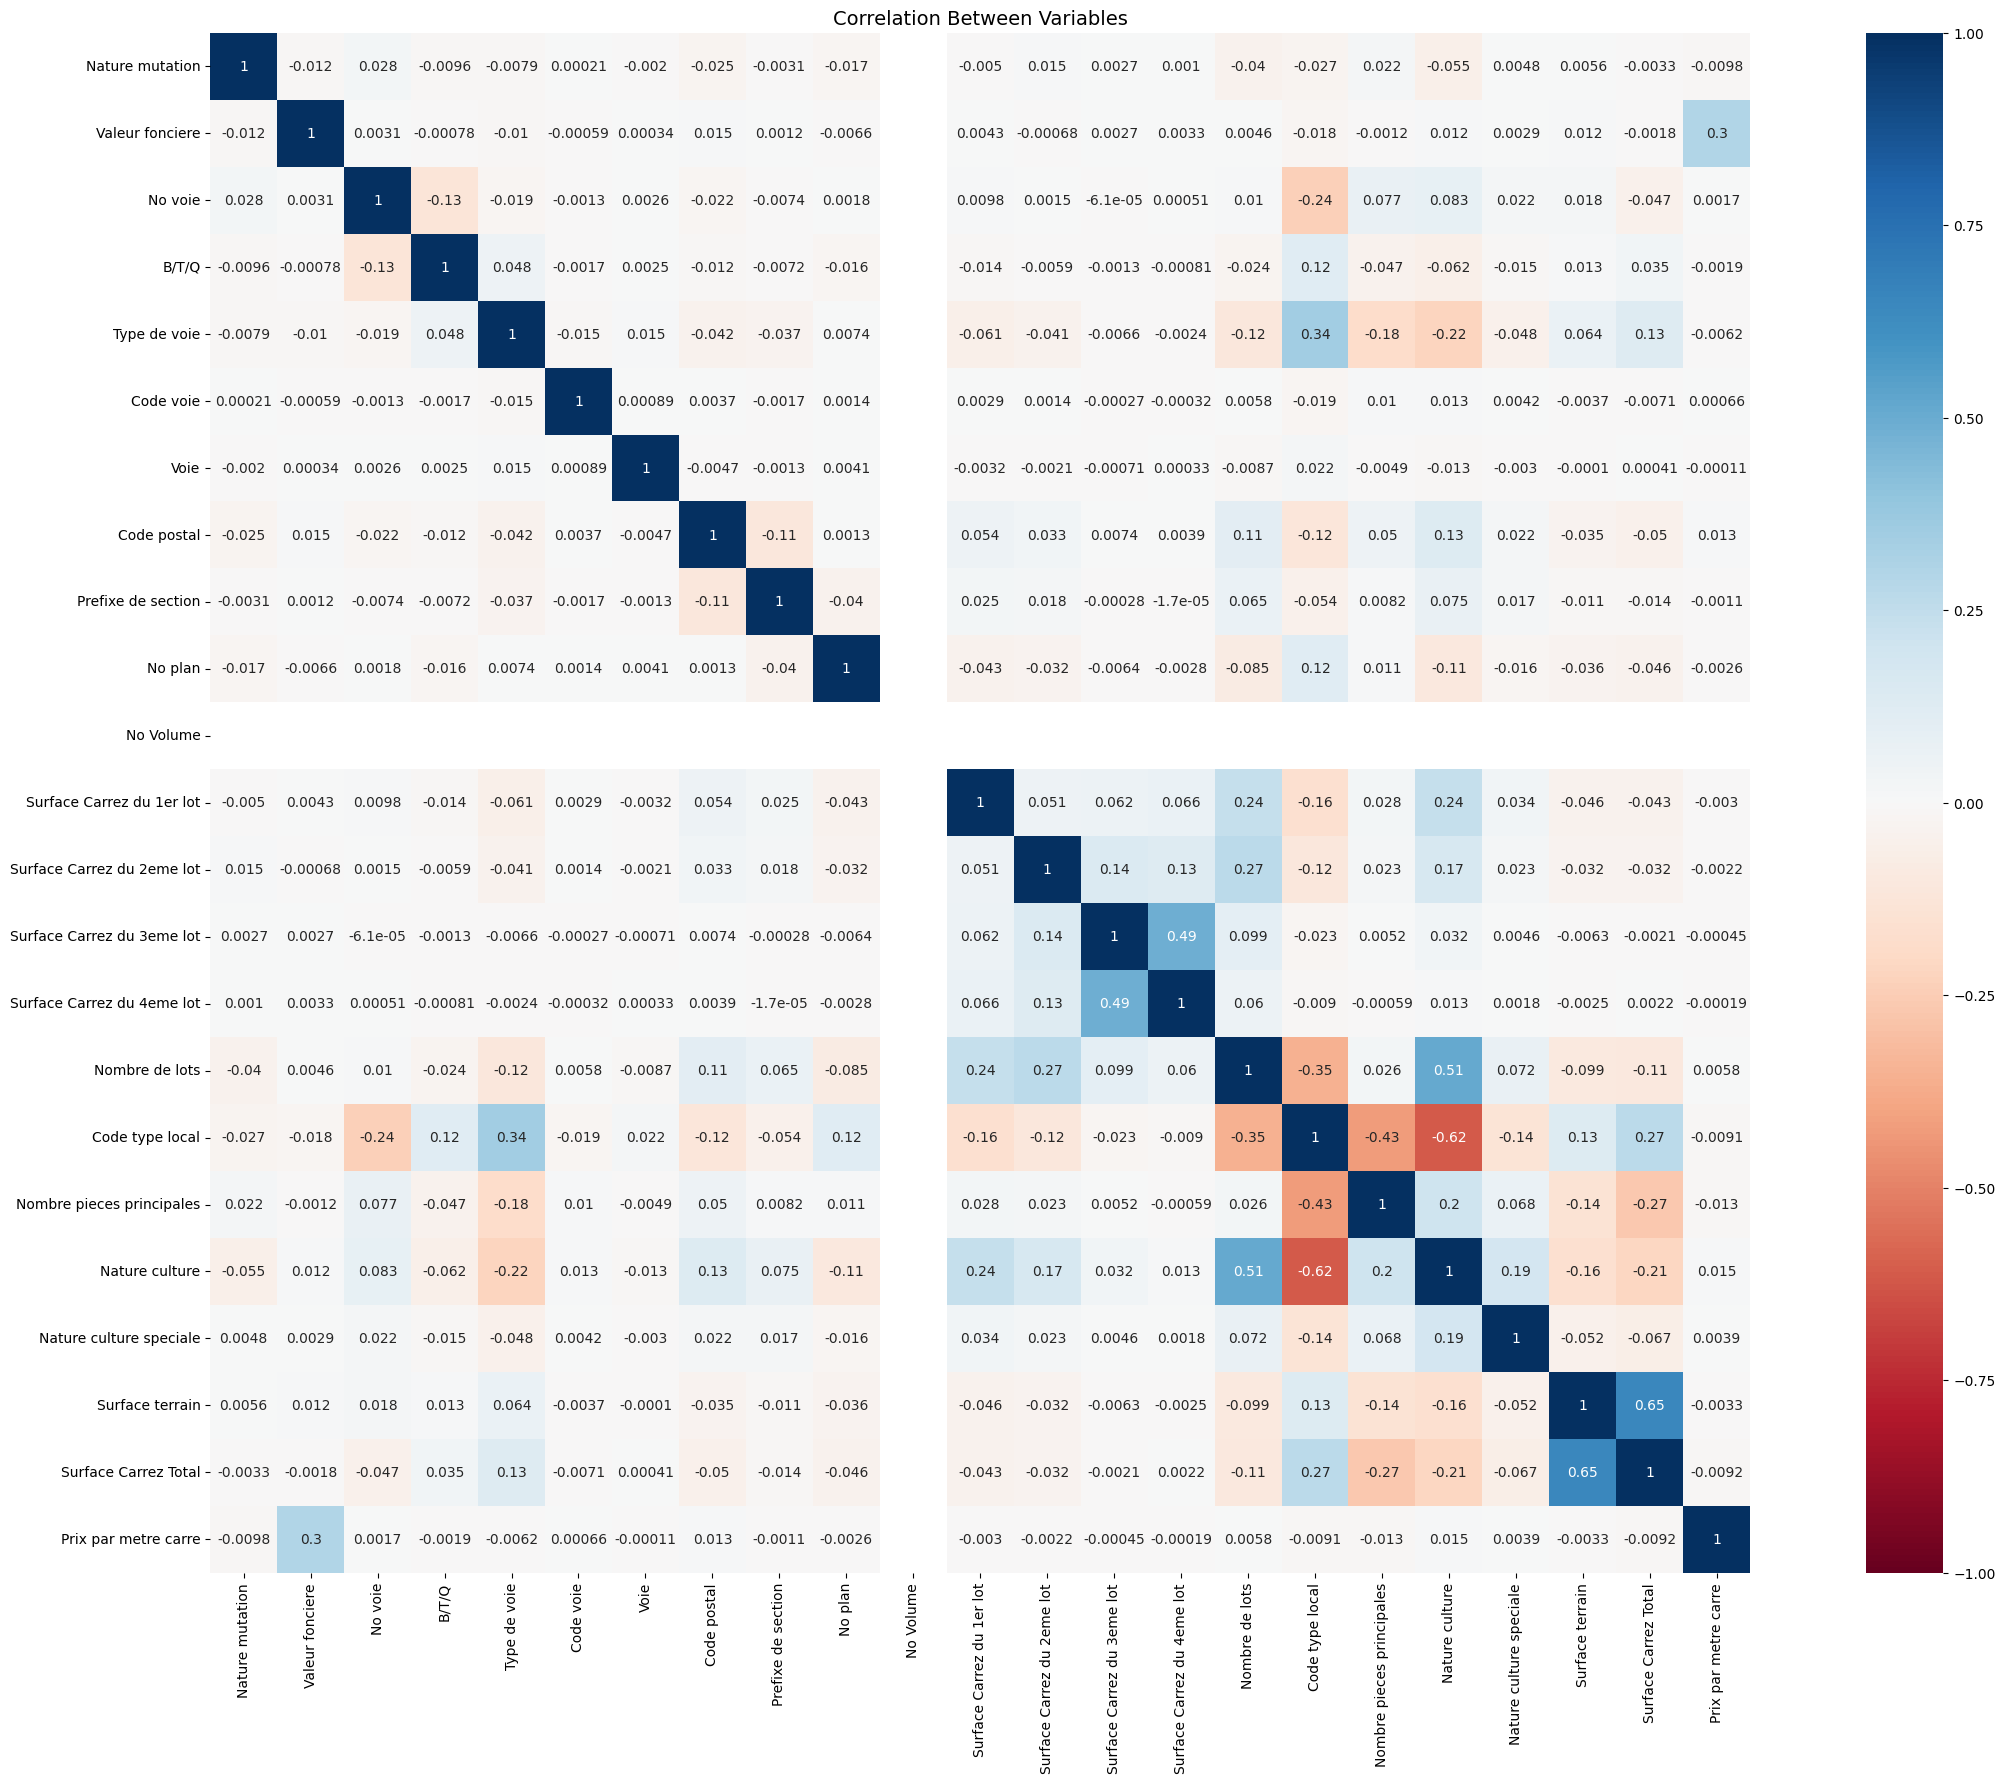

In [8]:
correlation_metrics=new_df.corr(numeric_only=True)
fig = plt.figure(figsize=(30,20))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

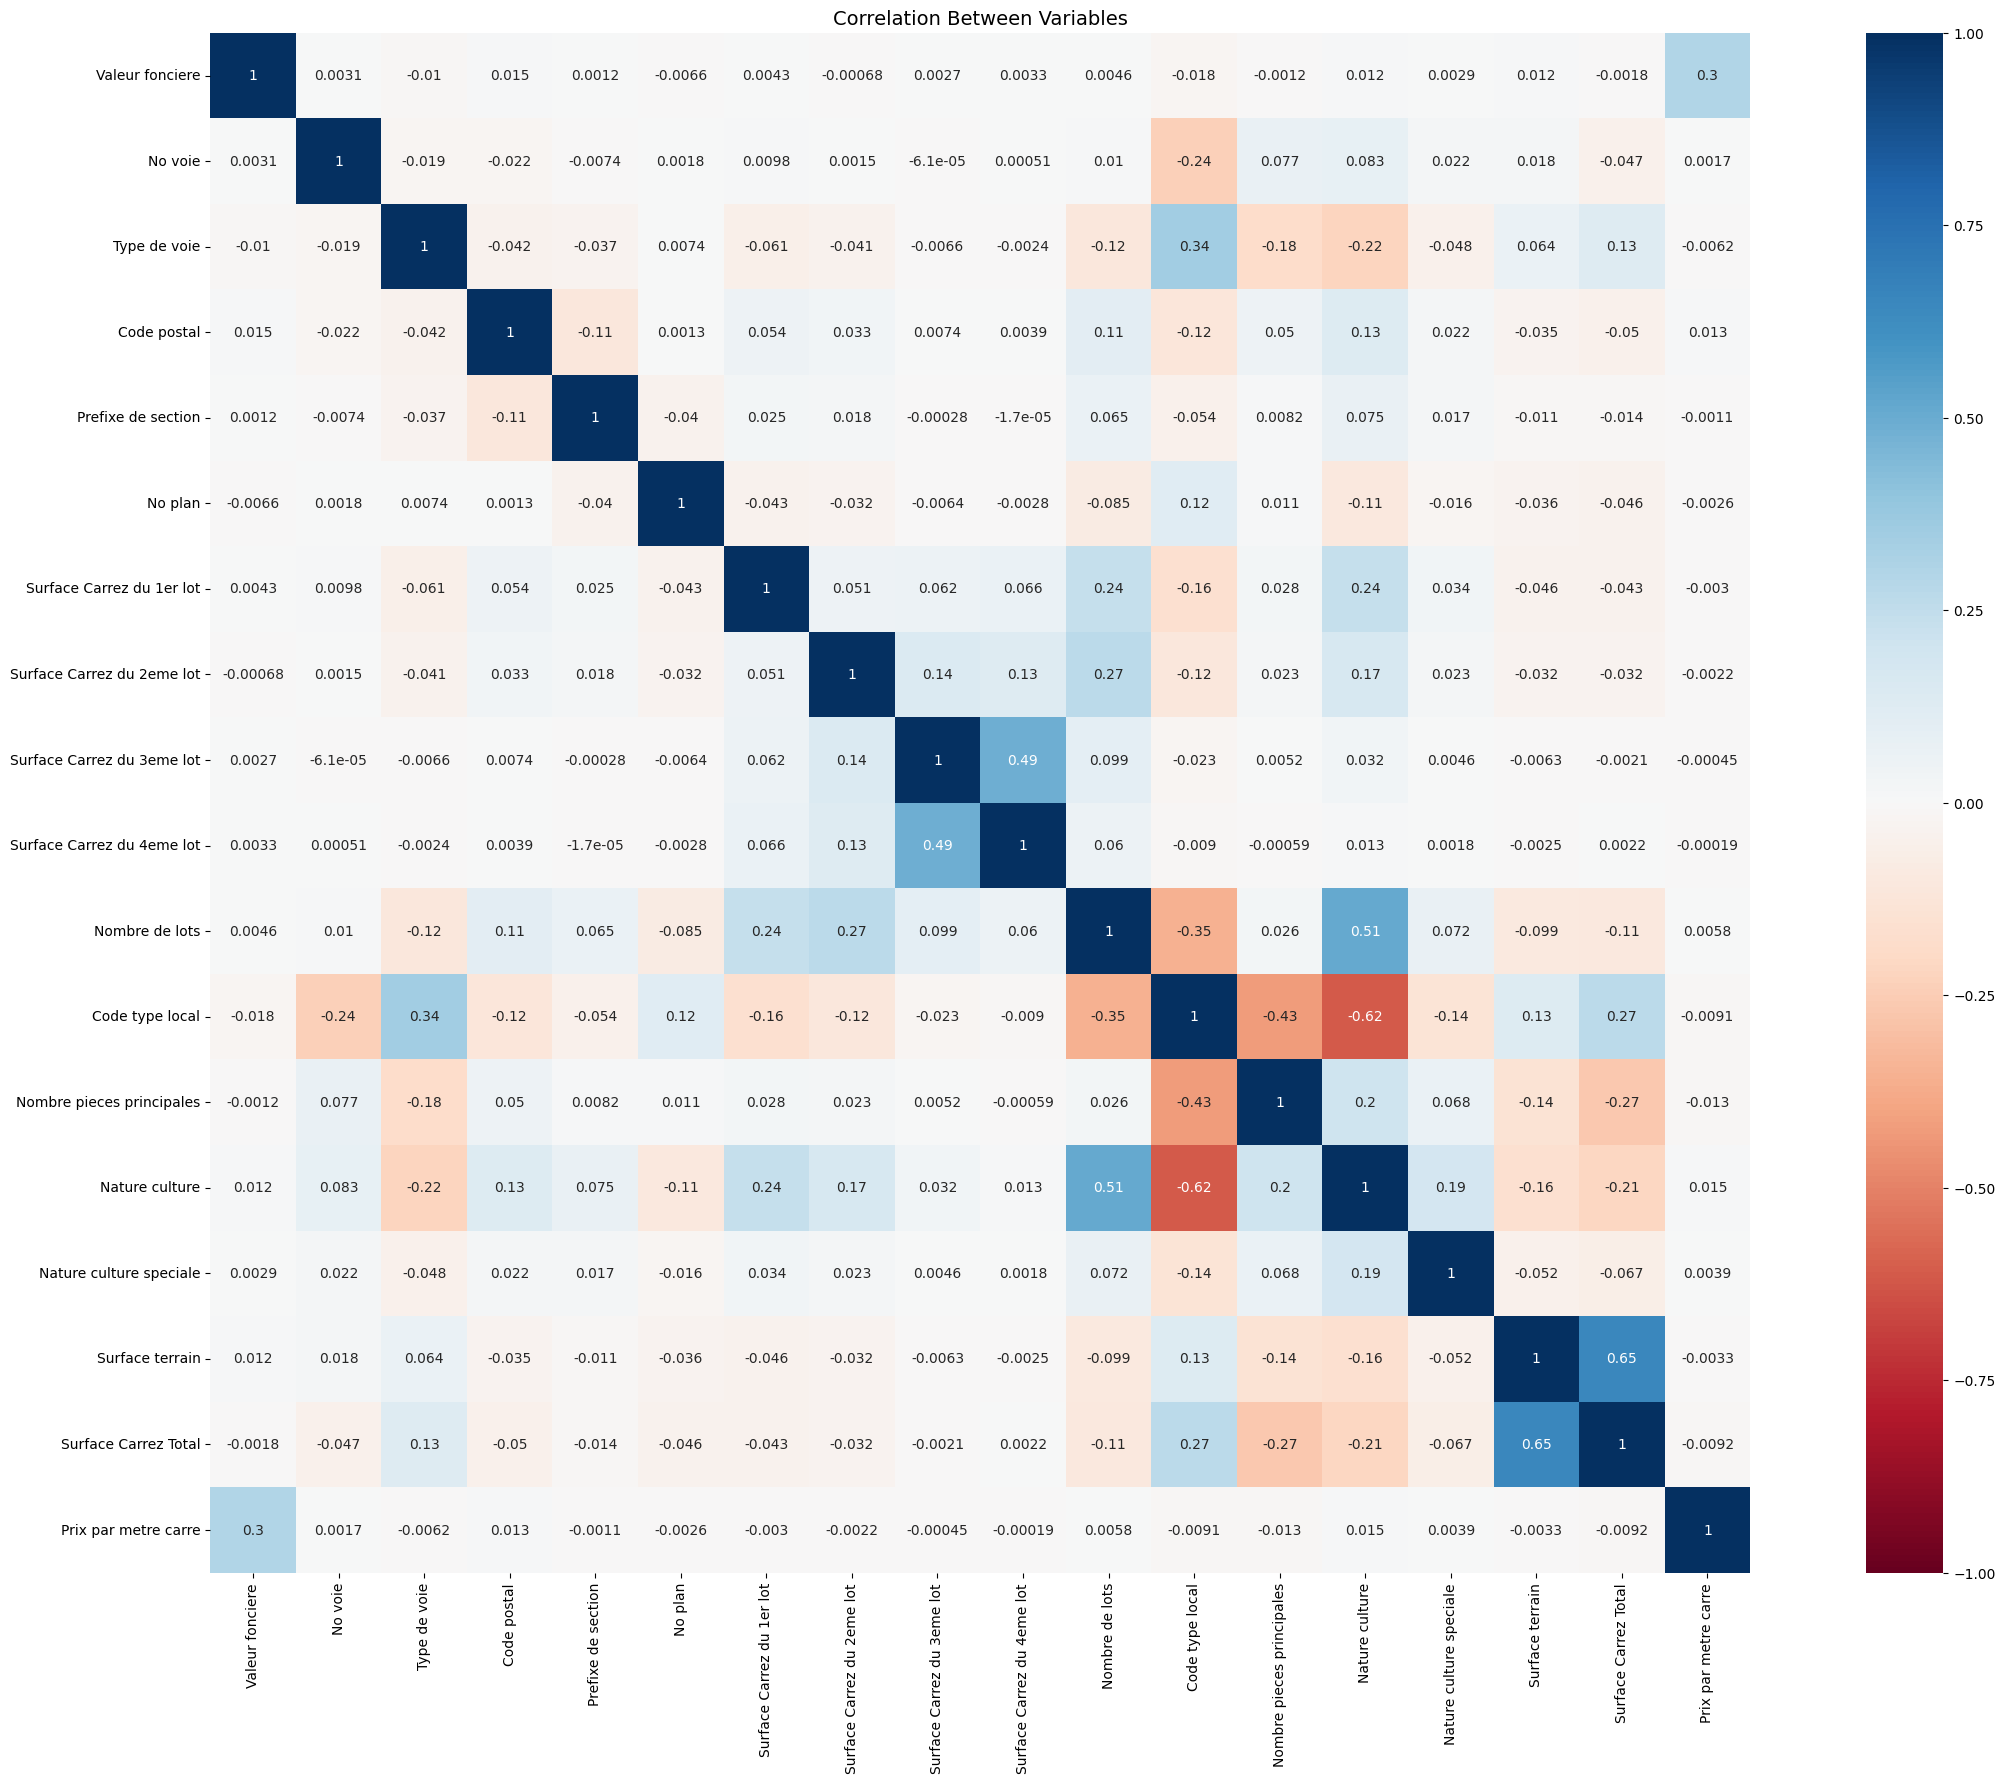

In [9]:
new_df = new_df.drop(['Nature mutation', 'B/T/Q','Code voie','Voie','No Volume'], axis=1)

correlation_metrics=new_df.corr(numeric_only=True)
fig = plt.figure(figsize=(30,20))
sns.heatmap(correlation_metrics,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

#### Another csv with all the changes

In [ ]:
new_df.to_csv("valeursfoncieres.csv", index=False)

In [ ]:
df_ac = pd.read_csv("valeursfoncieres.csv", low_memory=False)
df_ac

#### Now we display the box plot to deal with the outliers

In [ ]:
for i in range(1, len(df_ac.columns)):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x = df_ac.iloc[:, i])
    plt.show()